
# HyeongKyun Kim 21-732-797
# Songyi Han 18-796-847

*This assignment is done by **HyeongKyun Kim** and **SongYi Han** - We both **equally contributed** to this work by writing our own code individually first and then compare/merge them together.*


# A05: Scale-Free Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as spc

import networkx as nx

import powerlaw

In [2]:
# I skipped the Actors Network because it is too big to import and rund the code.
#G_actors = nx.read_gml('../data/graph_actors.gml')

G_amazon = nx.read_gml('../data/graph_amazon.gml')
G_escort = nx.read_gml('../data/graph_escort.gml')
G_internet = nx.read_gml('../data/graph_internet.gml')

# A05.1 Everyday networks are not Poisson: parameter estimation and model selection

*Task: F For all given networks compute the degree distribution 𝑃(𝑘) and the average degree ⟨𝑘⟩ and use the powerlaw package to fit 𝑃(𝑘).*

1. Compute the power-law exponent 𝛾 of the degree
distribution 𝑃(𝑘) ∼ 𝑘^(−𝛾) and the corresponding error
2. Superimpose in the same plot of the power-law fit (a) the
Poisson and (b) the exponential distribution with mean
value equal to ⟨𝑘⟩. Which distribution is more likely to
describe the data?
3. What does it mean in practice for the Internet?

## Function Definition

- poisson_dist
- exp_dist
- find_k_list
- avg_k
- power_law_fit


In [3]:
def poisson_dist (lamda, k):
    if spc.factorial(k) == float('inf'):
        return 0
    else:
        return ((lamda**k)/spc.factorial(k))*np.exp(-lamda)

def exp_dist (lamda, k):
    return (lamda**(-1))*np.exp(-k/lamda)

In [13]:
def find_k_list (G):
    #networkx.Graph.degree() : return DegreeView e.g. [('0',2),('1',10),...]
    g_degrees = G.degree()
    # g_k_list = [2,10,...]
    g_k_list = np.asarray([g_degrees[i] for i in G.nodes()])

    return g_k_list

def avg_k (G):
    num_g_nodes = len(G.nodes())
    sum_g_k = np.sum(find_k_list(G))
    return sum_g_k/num_g_nodes

def power_law_fit (g_k_list):
    fit = powerlaw.Fit(g_k_list) # discrete should be true (discrete = true)
    alpha = fit.power_law.alpha
    sigma = fit.power_law.sigma
    return fit, alpha, sigma

## [ANSWER] Internet Dataset

Which distribution is more likely to describe the data?
>- Power-Law Fit data shows the most closest 'Degree Distribution' given as a dataset

What does it mean in practice for the Internet?
>- Real World Data: the internet network shows a Heavy Tailed(Power-law) trend of the degree distribution.
>- It means that some nodes have extremely large degree rather than others.
>- This nodes can be considered as Hubs of the internet network.
>- Random Network, which is based on poisson or exponential degree distribution, can not describe the internet network's properties exactly. It shows overestimating around at avg.k and underestimate the low degree nodes and high degree nodes.

>- Most of real network follows power law distribution. It means that there are lots of nodes which has very few links whereas a few nodes which has extremely large links. When we think of Internet in practice, we can easily picture the reason why it follows power-low destribution. We can imagine there are many web pages created every second and wish to link to other pages. However, our knowledge is limited to a tiny fraction of the trillions of pages on the Web and most pages we are aware are likely to be popular - we know "popular node" in network means "high degree". As a result, it is reasonable that there are high number of pages which has either zero or one link to others, and few number of pages that is frequently linked for enormous of other pages. 


In [14]:
poisson_value_list = []
exp_value_list = []

k_org_list = find_k_list(G_internet)
k_avg = avg_k(G_internet)
k_minmax_list = np.linspace(min(k_org_list), max(k_org_list), len(k_org_list))


for k in k_minmax_list:

    poisson_value = poisson_dist(k_avg, k)
    poisson_value_list.append(poisson_value)

    exp_value = exp_dist(k_avg, k)
    exp_value_list.append(exp_value)
    #print(k)

fit, alpha, sigma = power_law_fit(k_org_list)

Calculating best minimal value for power law fit


Power-law expononet(alpha):  2.112191339113011
Corresponding error (sigma):  0.0366878070312722


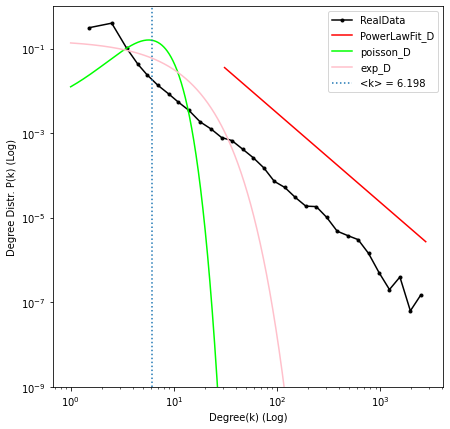

In [15]:
print('======================================')
print('Power-law expononet(alpha): ', alpha)
print('Corresponding error (sigma): ', sigma)
print('======================================')

plt.figure(figsize=(7,7))

powerlaw.plot_pdf(k_org_list, color = 'k', marker = 'o', markersize = 3, label = 'RealData')
fit.power_law.plot_pdf(color = 'r', label = 'PowerLawFit_D')
plt.plot(k_minmax_list, poisson_value_list, label = 'poisson_D', color = 'lime')
plt.plot(k_minmax_list, exp_value_list, label = 'exp_D', color = 'pink')
plt.axvline(k_avg, ls=':', label = '<k> = {:.3f}'.format(k_avg))
plt.xlabel('Degree(k) (Log)')
plt.ylabel('Degree Distr. P(k) (Log)')
plt.ylim(10**-9,10**0)
plt.legend()

## [ANSWER] Amazon Dataset

In [7]:
poisson_value_list = []
exp_value_list = []

k_org_list = find_k_list(G_amazon)
k_avg = avg_k(G_amazon)
k_minmax_list = np.linspace(min(k_org_list), max(k_org_list), len(k_org_list))


for k in k_minmax_list:

    poisson_value = poisson_dist(k_avg, k)
    poisson_value_list.append(poisson_value)

    exp_value = exp_dist(k_avg, k)
    exp_value_list.append(exp_value)
    #print(k)

fit, alpha, sigma = power_law_fit(k_org_list)

Calculating best minimal value for power law fit


Power-law expononet(alpha):  4.065660034466614
Corresponding error (sigma):  0.09699319113242895


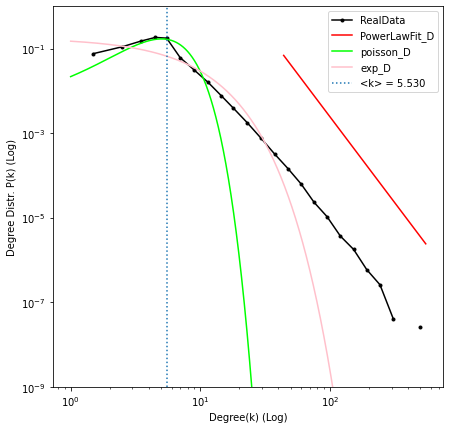

In [8]:
print('======================================')
print('Power-law expononet(alpha): ', alpha)
print('Corresponding error (sigma): ', sigma)
print('======================================')

plt.figure(figsize=(7,7))

powerlaw.plot_pdf(k_org_list, color = 'k', marker = 'o', markersize = 3, label = 'RealData')
fit.power_law.plot_pdf(color = 'r', label = 'PowerLawFit_D')
plt.plot(k_minmax_list, poisson_value_list, label = 'poisson_D', color = 'lime')
plt.plot(k_minmax_list, exp_value_list, label = 'exp_D', color = 'pink')
plt.axvline(k_avg, ls=':', label = '<k> = {:.3f}'.format(k_avg))
plt.xlabel('Degree(k) (Log)')
plt.ylabel('Degree Distr. P(k) (Log)')
plt.ylim(10**-9,10**0)
plt.legend()

## [ANSWER] Escorts Dataset

In [9]:
poisson_value_list = []
exp_value_list = []

k_org_list = find_k_list(G_escort)
k_avg = avg_k(G_escort)
k_minmax_list = np.linspace(min(k_org_list), max(k_org_list), len(k_org_list))


for k in k_minmax_list:

    poisson_value = poisson_dist(k_avg, k)
    poisson_value_list.append(poisson_value)

    exp_value = exp_dist(k_avg, k)
    exp_value_list.append(exp_value)
    #print(k)

fit, alpha, sigma = power_law_fit(k_org_list)

Calculating best minimal value for power law fit


Power-law expononet(alpha):  2.9544249080995764
Corresponding error (sigma):  0.07919729392592209


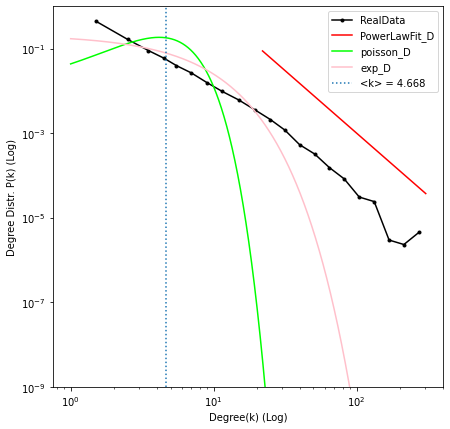

In [10]:
print('======================================')
print('Power-law expononet(alpha): ', alpha)
print('Corresponding error (sigma): ', sigma)
print('======================================')

plt.figure(figsize=(7,7))

powerlaw.plot_pdf(k_org_list, color = 'k', marker = 'o', markersize = 3, label = 'RealData')
fit.power_law.plot_pdf(color = 'r', label = 'PowerLawFit_D')
plt.plot(k_minmax_list, poisson_value_list, label = 'poisson_D', color = 'lime')
plt.plot(k_minmax_list, exp_value_list, label = 'exp_D', color = 'pink')
plt.axvline(k_avg, ls=':', label = '<k> = {:.3f}'.format(k_avg))
plt.xlabel('Degree(k) (Log)')
plt.ylabel('Degree Distr. P(k) (Log)')
plt.ylim(10**-9,10**0)
plt.legend()

# A05.2 Barabási-Albert model

*Task: Build networks with the Barabási-Albert model. Connect 𝑚 = 3 for each new node and grow until 𝑁 = 50, 100, 500, 1000, 5000, then compute some network properties. Compare them with randomised versions of the networks.*

1. Compute the average clustering coefficient, assortativity,
average shortest path length and diameter
2. Compare them by scatterplots with the same measures on
randomised versions of the networks (use log x axis)
3. Which of these measures is relatively unchanged by
randomisation? Why?

>[Answer]



>We randomised Barabási-Albert model by edge swaping method with swaping counts of 15. Since the swaping count is much smaller than the total numebr of edge of original graph, it makes sense that the randomisation doesn't bring a huge impact on network properties. Based on our test results, Avg. Clustering Coefficient and Avg. Shortest Path length are rarely changed. We think it is simply because it is an average property which should not be changed much by changing tiny percentage of nodes and links from original value. However, Assortativy and Max. Diameter was relatively changed - both Assortativity and Max.Diameter shows the higher offset from original graph. We think the reason why is the randomization can change a giant component and hubs weaker by disconnecting its high number of degree.


In [11]:
N_list = [50, 100, 500, 1000, 5000]
m = 3
T = [i for i in range(10)]

g_arr = []
grnd_arr = []

for N in N_list:
    
    _ = []
    _rnd = []
    #print(N,m)
    for t in T:
        g = nx.barabasi_albert_graph(N,m)
        _.append(g)
        #grnd = nx.gnm_random_graph(N,sum(dict(g.degree()).values())/2)
        niter = 15
        grnd = nx.algorithms.smallworld.random_reference(g, niter = niter, connectivity = False)
        _rnd.append(grnd)

    g_arr.append(_.copy())
    grnd_arr.append(_rnd.copy())


In [12]:
g_avgclst_list, grnd_avgclst_list = [],[]
g_assrt_list, grnd_assrt_list = [], []
g_avgsrtpath_list, grnd_avgsrtpath_list = [], []
g_d_list, grnd_d_list =[], []

for i in range(len(N_list)):

    _avgclst, _assrt, _avgsrtpath, _d = [],[],[],[]
    _rnd_avgclst, _rnd_assrt, _rnd_avgsrtpath, _rnd_d = [],[],[],[]

    for t in T:
    
        g = g_arr[i][t]
        grnd = grnd_arr[i][t]
        
        # 1. average clustering coefficient
        _, _rnd = nx.average_clustering(g), nx.average_clustering(grnd)
        _avgclst.append(_)
        _rnd_avgclst.append(_rnd)

        # 2. assortativity
        _, _rnd = nx.degree_assortativity_coefficient(g), nx.degree_assortativity_coefficient(grnd)
        _assrt.append(_)
        _rnd_assrt.append(_rnd)

        # 3. average shrotest path length
        _, _rnd = nx.average_shortest_path_length(g), nx.average_shortest_path_length(grnd)
        _avgsrtpath.append(_)
        _rnd_avgsrtpath.append(_rnd)

        # 4. Diameter
        _, _rnd = nx.diameter(g), nx.diameter(grnd)
        _d.append(_)
        _rnd_d.append(_rnd)

    g_avgclst_list.append(sum(_avgclst)/len(_avgclst))
    g_assrt_list.append(sum(_assrt)/len(_assrt))
    g_avgsrtpath_list.append(sum(_avgsrtpath)/len(_avgsrtpath))
    g_d_list.append(sum(_d)/len(_d))

    grnd_avgclst_list.append(sum(_rnd_avgclst)/len(_rnd_avgclst))
    grnd_assrt_list.append(sum(_rnd_assrt)/len(_rnd_assrt))
    grnd_avgsrtpath_list.append(sum(_rnd_avgsrtpath)/len(_rnd_avgsrtpath))
    grnd_d_list.append(sum(_rnd_d)/len(_rnd_d))

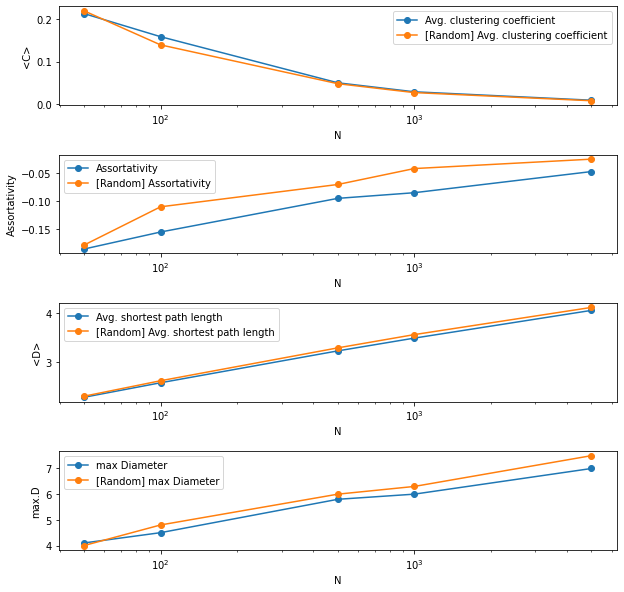

In [13]:
fig, axs = plt.subplots(4,1, figsize = (10,10))

axs[0].plot(N_list, g_avgclst_list, marker = 'o', label = 'Avg. clustering coefficient')
axs[0].plot(N_list, grnd_avgclst_list, marker = 'o', label = '[Random] Avg. clustering coefficient')
axs[0].set_xscale('log')
axs[0].set_xlabel('N')
axs[0].set_ylabel('<C>')
axs[0].legend()

axs[1].plot(N_list, g_assrt_list, marker = 'o', label = 'Assortativity')
axs[1].plot(N_list, grnd_assrt_list, marker = 'o', label = '[Random] Assortativity')
axs[1].set_xscale('log')
axs[1].set_xlabel('N')
axs[1].set_ylabel('Assortativity')
axs[1].legend()

axs[2].plot(N_list, g_avgsrtpath_list, marker = 'o', label = 'Avg. shortest path length')
axs[2].plot(N_list, grnd_avgsrtpath_list, marker = 'o', label = '[Random] Avg. shortest path length')
axs[2].set_xscale('log')
axs[2].set_xlabel('N')
axs[2].set_ylabel('<D>')
axs[2].legend()

axs[3].plot(N_list, g_d_list, marker = 'o', label = 'max Diameter')
axs[3].plot(N_list, grnd_d_list, marker = 'o', label = '[Random] max Diameter')
axs[3].set_xscale('log')
axs[3].set_xlabel('N')
axs[3].set_ylabel('max.D')
axs[3].legend()

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)